In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tabulate import tabulate
import scipy.stats as stats
df = sns.load_dataset('titanic')
print(tabulate(df, headers='keys', tablefmt='pretty'))

+-----+----------+--------+--------+------+-------+-------+----------+----------+--------+-------+------------+------+-------------+-------+-------+
|     | survived | pclass |  sex   | age  | sibsp | parch |   fare   | embarked | class  |  who  | adult_male | deck | embark_town | alive | alone |
+-----+----------+--------+--------+------+-------+-------+----------+----------+--------+-------+------------+------+-------------+-------+-------+
|  0  |    0     |   3    |  male  | 22.0 |   1   |   0   |   7.25   |    S     | Third  |  man  |    True    | nan  | Southampton |  no   | False |
|  1  |    1     |   1    | female | 38.0 |   1   |   0   | 71.2833  |    C     | First  | woman |   False    |  C   |  Cherbourg  |  yes  | False |
|  2  |    1     |   3    | female | 26.0 |   0   |   0   |  7.925   |    S     | Third  | woman |   False    | nan  | Southampton |  yes  | True  |
|  3  |    1     |   1    | female | 35.0 |   1   |   0   |   53.1   |    S     | First  | woman |   False

In [227]:
df.isnull().sum().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

,index,count
11,deck,688
3,age,177
7,embarked,2
12,embark_town,2
0,survived,0
1,pclass,0
2,sex,0
4,sibsp,0
5,parch,0
6,fare,0


In [228]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [229]:
df.isnull().sum().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

,index,count
11,deck,688
7,embarked,2
12,embark_town,2
0,survived,0
1,pclass,0
2,sex,0
3,age,0
4,sibsp,0
5,parch,0
6,fare,0


In [230]:
from sklearn.model_selection import train_test_split
X = df[['age', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


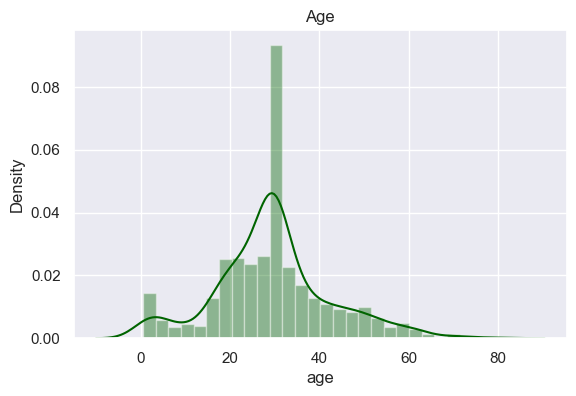

In [231]:
# Plot Distribution of Age Columns
import warnings
warnings.filterwarnings('ignore')
def Agedistribution(X_train: pd.DataFrame):
  sns.set()
  plt.figure(figsize=(14, 4))
  plt.subplot(121)
  sns.distplot(X_train['age'], color = 'darkgreen')
  plt.title('Age')
  plt.show()

Agedistribution(X_train)

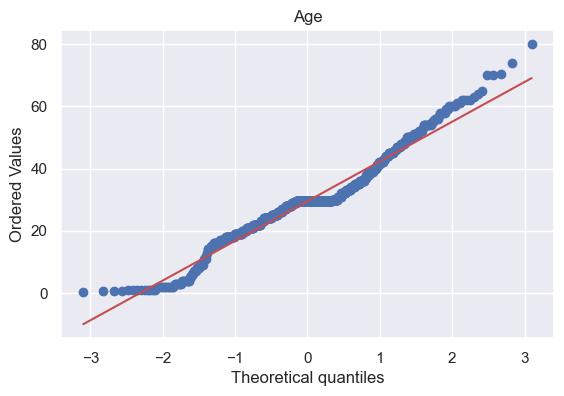

In [232]:
# QQ plot
def QQplotage(X_train: pd.DataFrame):
     
     plt.figure(figsize=(14,4))
     plt.subplot(121)
     stats.probplot(X_train['age'], dist = 'norm', plot = plt)
     plt.title('Age')
     plt.show()
     
QQplotage(X_train)
     

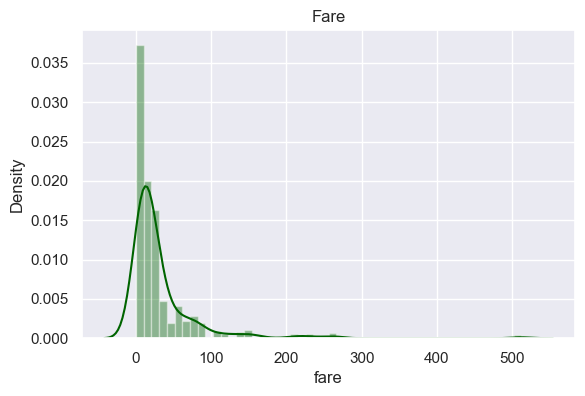

In [233]:
# normal Distribution of fare

import warnings
warnings.filterwarnings('ignore')
def Faredistribution(X_train: pd.DataFrame):
  sns.set()
  plt.figure(figsize=(14, 4))
  plt.subplot(121)
  sns.distplot(X_train['fare'], color = 'darkgreen')
  plt.title('Fare')
  plt.show()

Faredistribution(X_train)

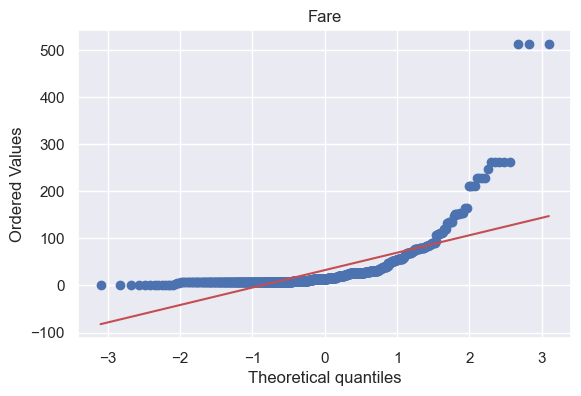

In [234]:
# QQ plot
def QQplotfare(X_train: pd.DataFrame):
     
     plt.figure(figsize=(14,4))
     plt.subplot(121)
     stats.probplot(X_train['fare'], dist = 'norm', plot = plt)
     plt.title('Fare')
     plt.show()
     
QQplotfare(X_train)
     

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc1 = accuracy_score(y_test, y_pred1)

print("Accuracy Score LR=>",  acc)
print("Accuracy Score DT=>",  acc1)


Accuracy Score LR=> 0.6480446927374302
Accuracy Score DT=> 0.6480446927374302


In [236]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# Modelling
clf = LogisticRegression()
clf2 = DecisionTreeRegressor()

# fit model

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# predict 
y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test)

# accuracy score 

acc = accuracy_score(y_test, y_pred)
acc1 = accuracy_score(y_test, y_pred1)


print("LR:", acc)
print("DT:", acc1)



LR: 0.6480446927374302
DT: 0.6480446927374302


In [237]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [238]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [239]:
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf.predict(X_test_transformed)

In [240]:
print("Logistic Regression Accuracy:",accuracy_score( y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred1))

Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6815642458100558


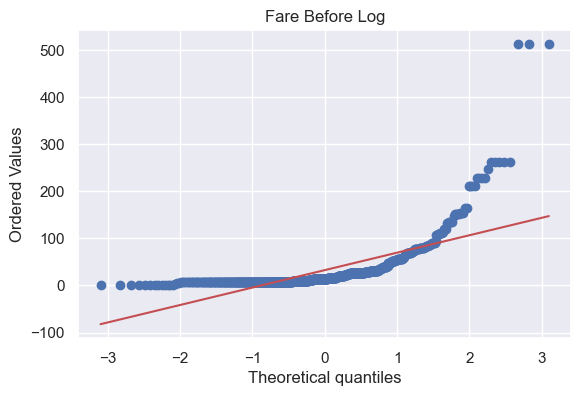

In [241]:
def AfterTransformation(X_train:pd.DataFrame):

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train['fare'], dist='norm', plot = plt)
  plt.title("Fare Before Log")


def Afterplot( X_train_transformed:pd.DataFrame):
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train_transformed['fare'], dist='norm', plot = plt)
  plt.title("Fare After Log")
  plt.show()

AfterTransformation(X_train)

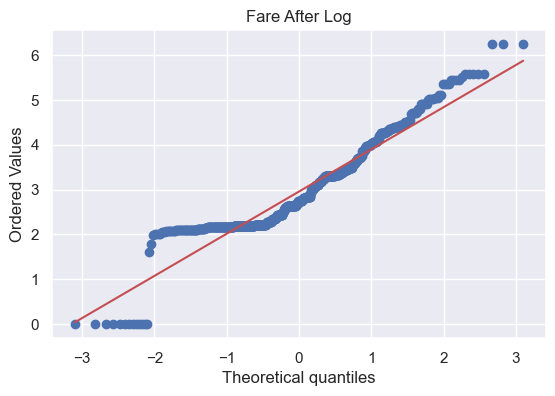

In [242]:
Afterplot(X_train_transformed)

In [243]:
Flpk = pd.read_excel(r"C:\personal\Sklearn_And_Python_For_Interview\Flipkart_data.xlsx")
Flpk

,Campaign_Name_Partner_Hyyzo,Amount_Partner_Hyyzo,Payout_Partner_Hyyzo,Date_Partner_Hyyzo,CK_Payout,HY_Payout
0,Flipkart [CPS] IN,257,4.52,2024-10-19,4.017778,4.268889
1,Flipkart [CPS] IN,279,7.19,2024-10-19,6.391111,6.790556
2,Flipkart [CPS] IN,71,1.80,2024-10-19,1.600000,1.700000
3,Flipkart [CPS] IN,369,9.92,2024-10-19,8.817778,9.368889
4,Flipkart [CPS] IN,579,10.82,2024-10-19,9.617778,10.218889
...,...,...,...,...,...,...
99,Flipkart [CPS] IN,82,1.80,2024-10-20,1.600000,1.700000
100,Flipkart [CPS] IN,218,6.30,2024-10-20,5.600000,5.950000
101,Flipkart [CPS] IN,398,7.20,2024-10-20,6.400000,6.800000
102,Flipkart [CPS] IN,219,6.30,2024-10-20,5.600000,5.950000


In [244]:
Flpk.isnull().sum()

Campaign_Name_Partner_Hyyzo    0
Amount_Partner_Hyyzo           0
Payout_Partner_Hyyzo           0
Date_Partner_Hyyzo             0
CK_Payout                      0
HY_Payout                      0
dtype: int64

In [245]:
X = Flpk[['Amount_Partner_Hyyzo','Payout_Partner_Hyyzo']]
y = Flpk['CK_Payout']

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


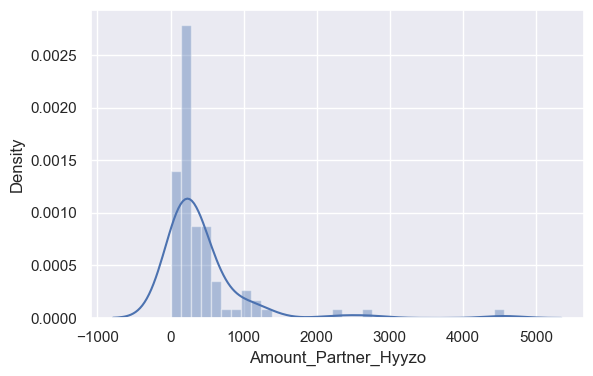

In [247]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Amount_Partner_Hyyzo'])
plt.show()

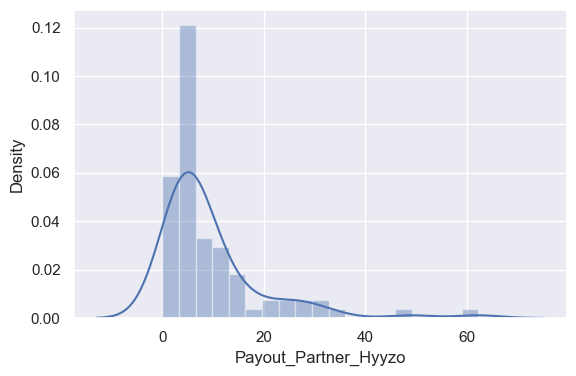

In [248]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Payout_Partner_Hyyzo'])
plt.show()

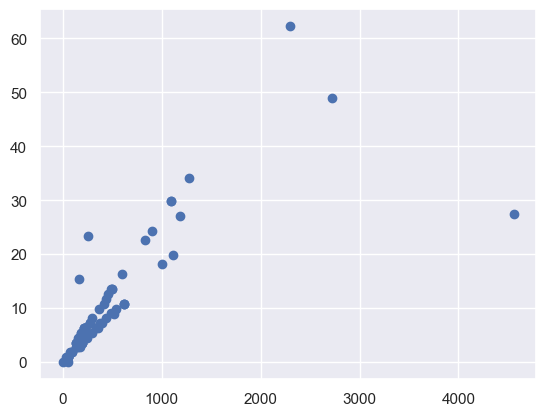

In [249]:
plt.scatter(X_train['Amount_Partner_Hyyzo'], X_train['Payout_Partner_Hyyzo'])
plt.show()

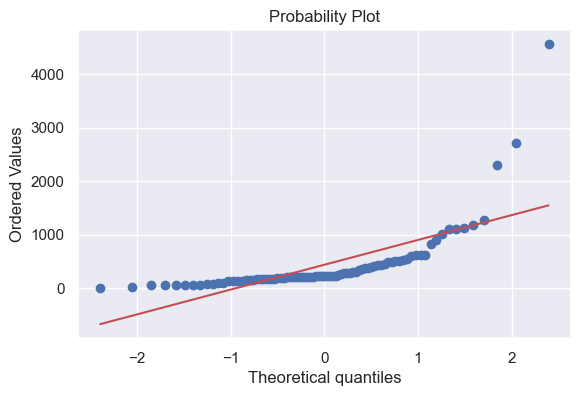

In [250]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Amount_Partner_Hyyzo'], dist = 'norm', plot = plt)
plt.show()

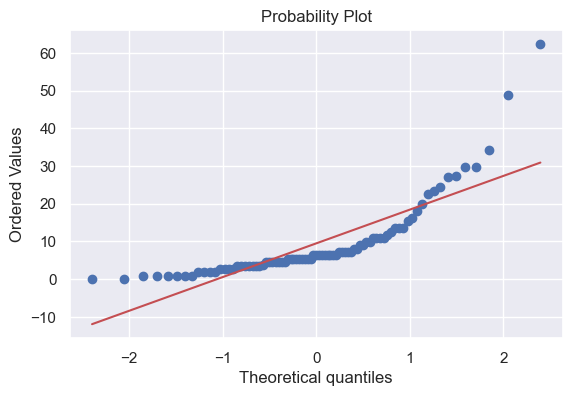

In [251]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Payout_Partner_Hyyzo'], dist = 'norm', plot = plt)
plt.show()

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

alf = LinearRegression()
alf2 = DecisionTreeRegressor()

alf.fit(X_train, y_train)
alf2.fit(X_train, y_train)

y_preds = alf.predict(X_test)
y_preds1 = alf2.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_preds))
print("Decision Tree Regression R²:", r2_score(y_test, y_preds1))


Linear Regression R²: 1.0
Decision Tree Regression R²: 0.9893412784917084


In [253]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Log-transform features
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

# Models
alf = LinearRegression()
alf2 = DecisionTreeRegressor(random_state=42)

# Train models
alf.fit(X_train_transformed, y_train)
alf2.fit(X_train_transformed, y_train)

# Predictions
y_preds_linear = alf.predict(X_test_transformed)
y_preds_tree = alf2.predict(X_test_transformed)

# R² scores
print("Linear Regression R²:", r2_score(y_test, y_preds_linear))
print("Decision Tree Regression R²:", r2_score(y_test, y_preds_tree))


Linear Regression R²: -2.521790951223868
Decision Tree Regression R²: 0.9762015059469071


In [254]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

alf.fit(X_train_log, y_train_log)
y_preds_log = alf.predict(X_test_log)
y_preds = np.expm1(y_preds_log)

print("Linear Regression R²:", r2_score(y_test, y_preds))


Linear Regression R²: 0.9998839140277767


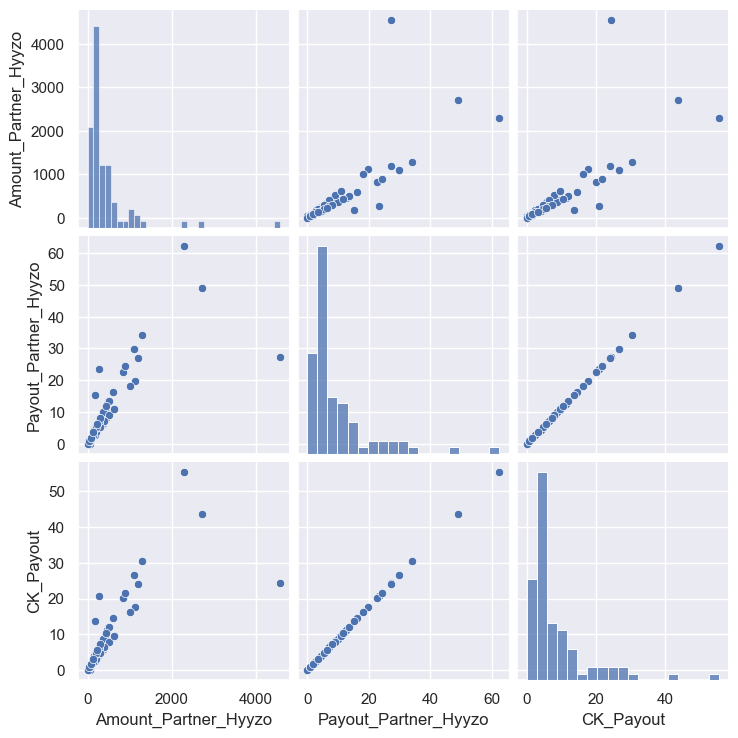

In [255]:
import seaborn as sns
sns.pairplot(X_train.assign(CK_Payout=y_train))
plt.show()


In [256]:
print("Linear Regression R²:", r2_score(y_test, y_preds))
print("Decision Tree Regression R²:", r2_score(y_test, y_preds1))

Linear Regression R²: 0.9998839140277767
Decision Tree Regression R²: 0.9893412784917084


In [257]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Log-transform features
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

# Models
alf = LinearRegression()
alf2 = DecisionTreeRegressor(random_state=42)

# Train models
alf.fit(X_train_transformed, y_train)
alf2.fit(X_train_transformed, y_train)

# Predictions
y_preds_linear = alf.predict(X_test_transformed)
y_preds_tree = alf2.predict(X_test_transformed)

# R² scores
print("Linear Regression R²:", r2_score(y_test, y_preds_linear))
print("Decision Tree Regression R²:", r2_score(y_test, y_preds_tree))


Linear Regression R²: -2.521790951223868
Decision Tree Regression R²: 0.9762015059469071


In [258]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

model = LinearRegression()
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

print("R² after log transform:", r2_score(y_test, y_pred))


R² after log transform: 0.5989775734197698


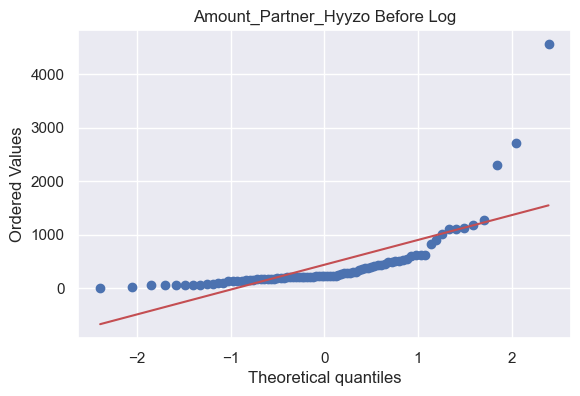

In [259]:
def AfterTransformation(X_train:pd.DataFrame):

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train['Amount_Partner_Hyyzo'], dist='norm', plot = plt)
  plt.title("Amount_Partner_Hyyzo Before Log")


def Afterplot( X_train_transformed:pd.DataFrame):
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train_transformed['Amount_Partner_Hyyzo'], dist='norm', plot = plt)
  plt.title("Amount_Partner_Hyyzo After Log")
  plt.show()

AfterTransformation(X_train)

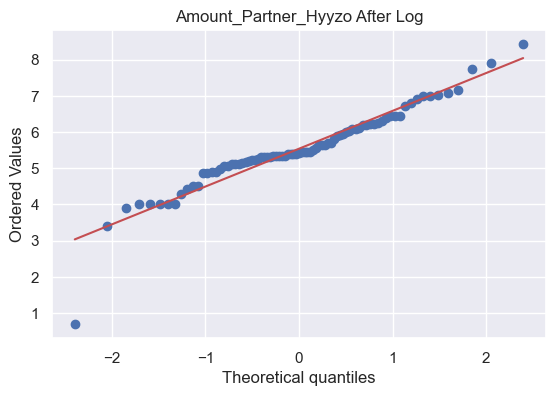

In [260]:
Afterplot(X_train_transformed)

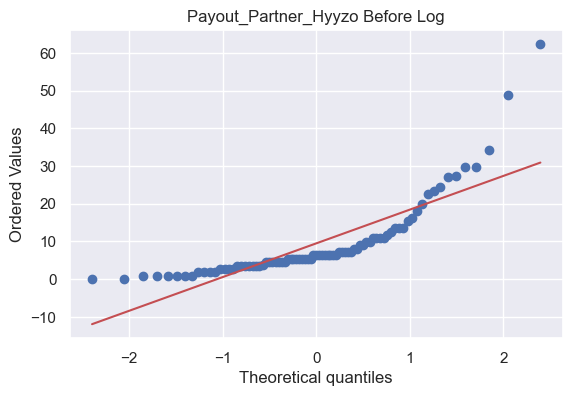

In [261]:
def AfterTransformation(X_train:pd.DataFrame):

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train['Payout_Partner_Hyyzo'], dist='norm', plot = plt)
  plt.title("Payout_Partner_Hyyzo Before Log")


def Afterplot( X_train_transformed:pd.DataFrame):
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train_transformed['Payout_Partner_Hyyzo'], dist='norm', plot = plt)
  plt.title("Payout_Partner_Hyyzo After Log")
  plt.show()

AfterTransformation(X_train)

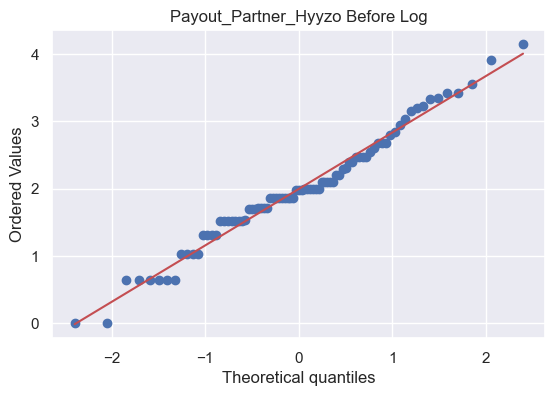

In [262]:
AfterTransformation(X_train_transformed)

R² Score: -6.260143961399724


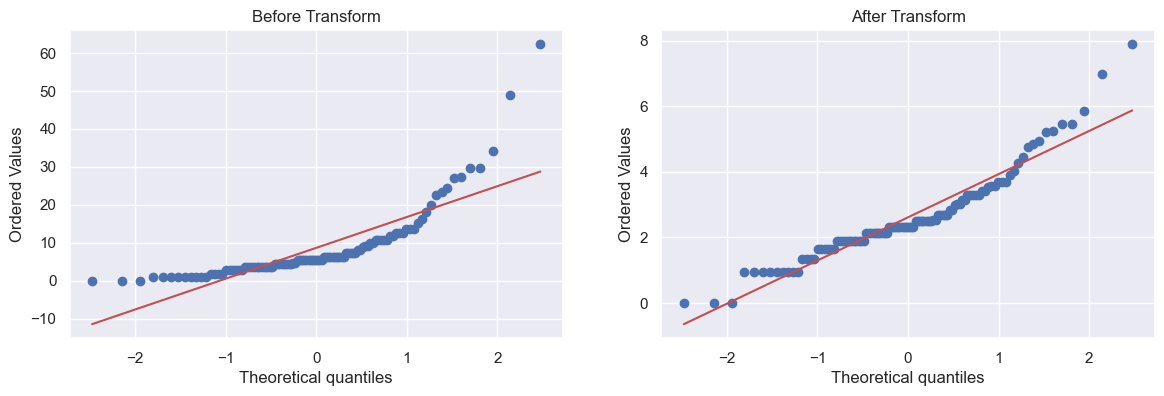

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

def apply_transform(transform):
    y = Flpk['CK_Payout']
    X = Flpk[['Amount_Partner_Hyyzo','Payout_Partner_Hyyzo']]

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Payout_Partner_Hyyzo'])
    ], remainder='passthrough')

    X_trans = trf.fit_transform(X)
    reg = LinearRegression()

    print("R² Score:", np.mean(cross_val_score(reg, X_trans, y, scoring='r2', cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Payout_Partner_Hyyzo'], dist='norm', plot=plt)
    plt.title('Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
    plt.title('After Transform')

    plt.show()

apply_transform(lambda x: np.sqrt(x))  # fixed transformation


R² Score: 1.0


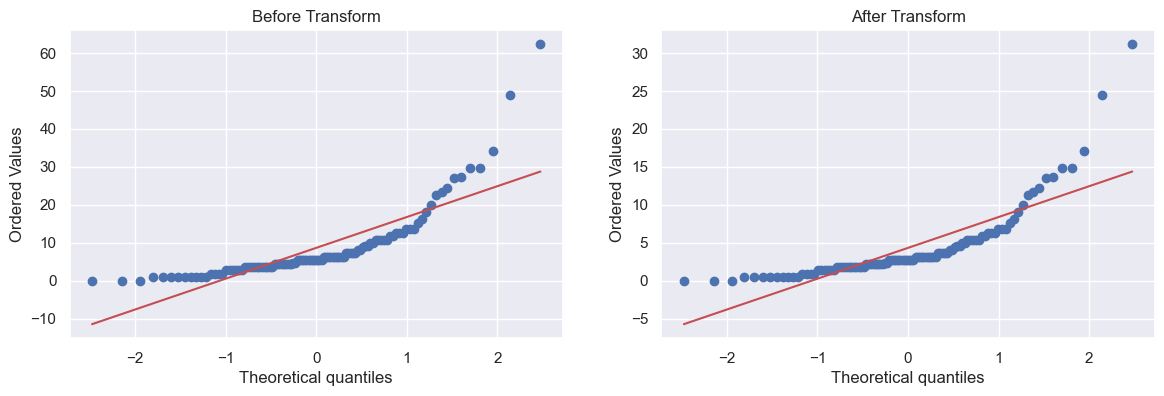

In [264]:
apply_transform(lambda x: x**1/2)

R² Score: -216.24001021611494


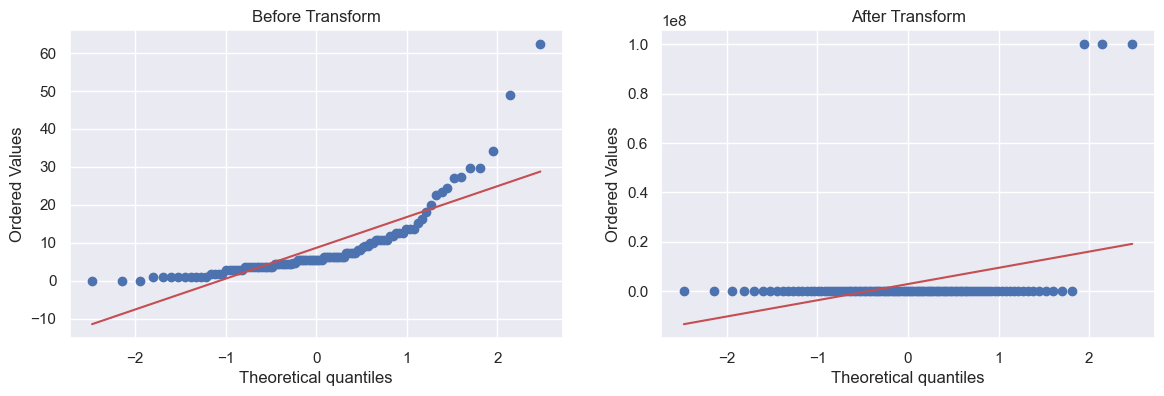

In [265]:
apply_transform(lambda x: 1/(x + 0.00000001))

R² Score: -216.70719732950002


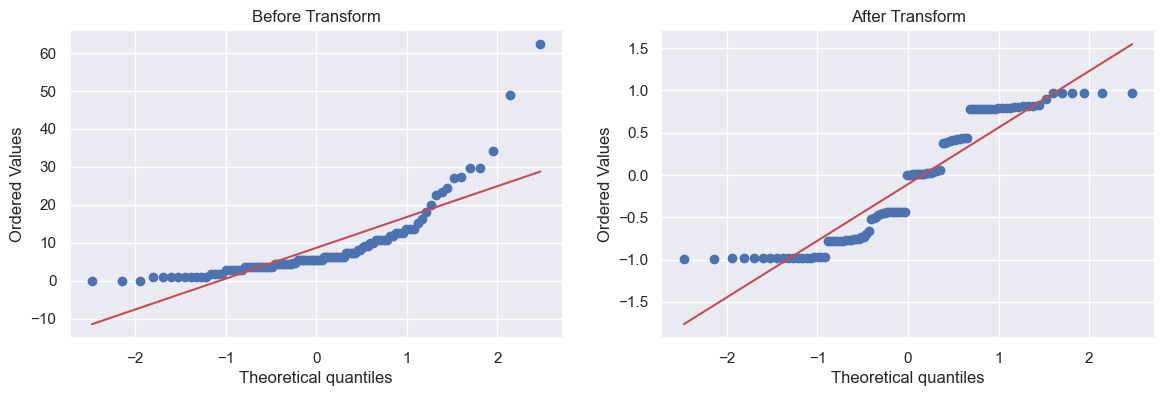

In [266]:
apply_transform(np.sin)

In [267]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)
alf = LinearRegression()
alf2 = DecisionTreeRegressor()
alf.fit(X_train_transformed, y_train)
alf2.fit(X_train_transformed, y_train)
y_preds = alf.predict(X_test_transformed)
y_preds = alf2.predict(X_test_transformed)
print("Linear Regression R²:", r2_score(y_test, y_preds))
print("Decision Tree Regression R²:", r2_score(y_test, y_preds1))

Linear Regression R²: 0.9893406209112587
Decision Tree Regression R²: 0.9893412784917084
